In [71]:
import pandas as pd
import dtale
import plotly.express as px 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [23]:
# imp links 
# https://towardsdatascience.com/setting-up-a-data-science-environment-using-windows-subsystem-for-linux-wsl-c4b390803dd


In [44]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
#EDA using Autoviz
# autoviz = AutoViz_Class().AutoViz("data", dfte="pandasDF")

data = pd.read_excel("dtm-iraq-returnees-master-list-round-119.xlsx", skiprows = [0,1,3])

data.head()
data.to_csv("data.csv")


In [ ]:
def clean_dataframe_column_names(df):
    cols = df.columns
    new_column_names = []

    for col in cols:
        new_col = col.lstrip().rstrip().lower().replace (" ", "_") #strip beginning spaces, makes lowercase, add underscpre
        new_column_names.append(new_col)

    df.columns = new_column_names

clean_dataframe_column_names(data)    
# data = clean_dataframe_column_names(data)

In [48]:
data.columns

Index(['date_reported', 'date_occurred', 'round_#', 'place_id', 'country',
       'country_code', 'governorate', 'governorate_code', 'district',
       'location_name\nin_english', 'location_name\nin_arabic', 'latitude',
       'longitude', 'households', 'individuals',
       'households_returned_from_camp', 'host_families', 'hotel/motel',
       'rented_houses', 'habitual_residnece_(habitable)',
       'habitual_residence_(uninhabitable)', 'informal_settlements',
       'unfinished/\nabandoned_building', 'non-residential_structure',
       'religious_building', 'school_building',
       'other_formal_settlements/_collective_centres', 'other_shelters',
       'unknown_shelter_type', 'anbar', 'babylon', 'baghdad', 'basrah',
       'dahuk', 'diyala', 'erbil', 'kerbala', 'kirkuk', 'missan', 'muthanna',
       'najaf', 'ninewa', 'qadissiya', 'salah_al-din', 'sulaymaniyah',
       'thi-qar', 'wassit', 'pre-june14_period', 'june-july14_period',
       'august14_period', 'post_september14_per

Shape of your Data Set: (2121, 61)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  22
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  29
    61 Predictors classified...
        This does not include the Target column(s)
        32 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 253


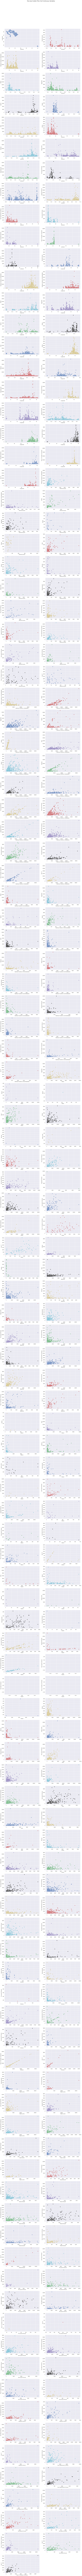

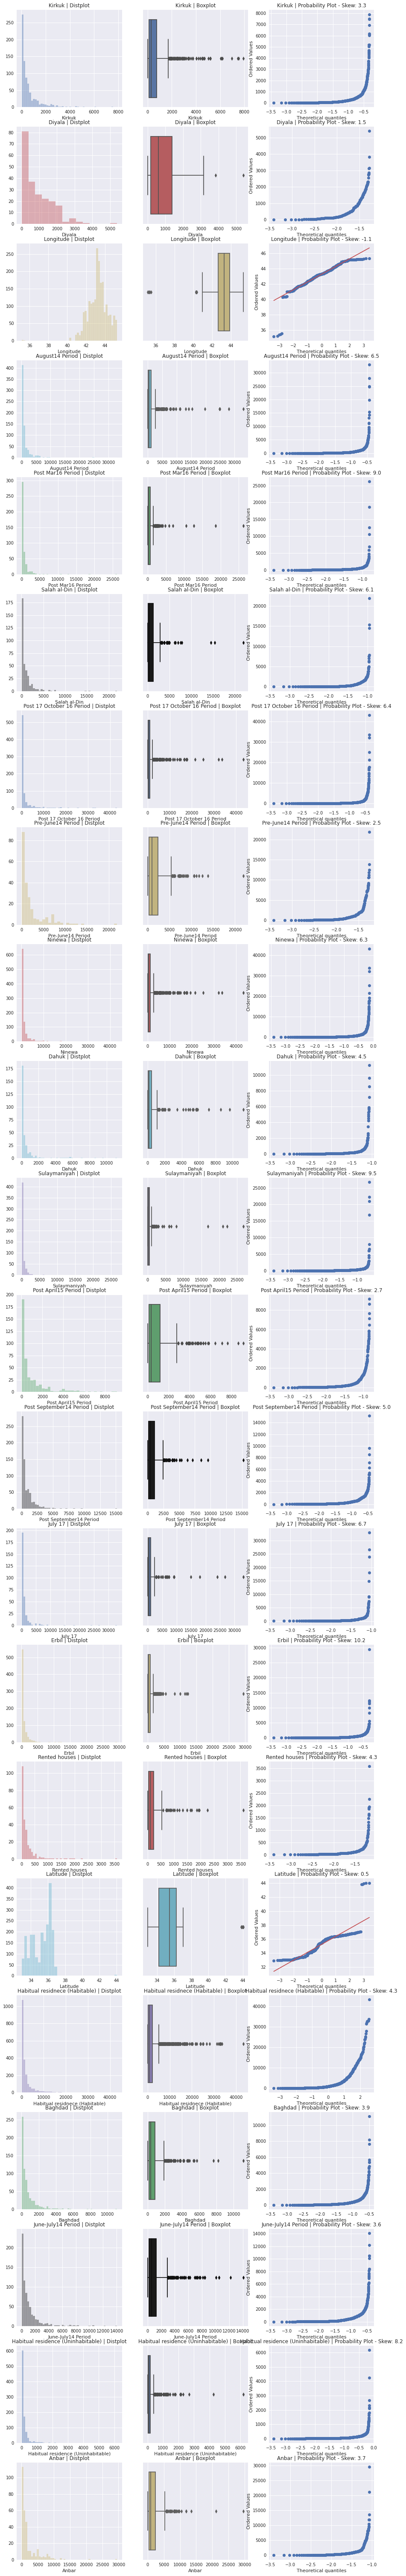

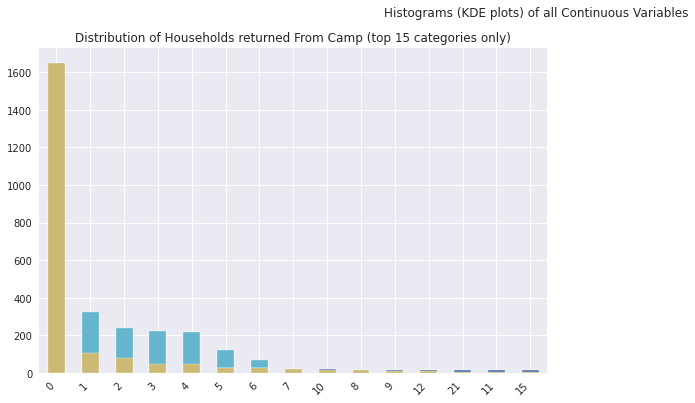

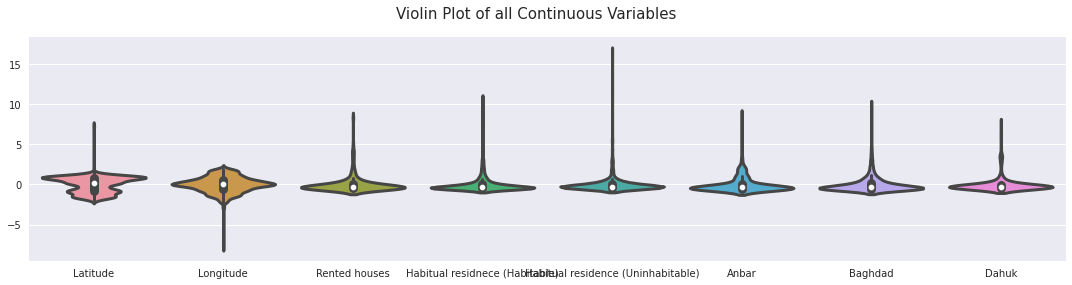

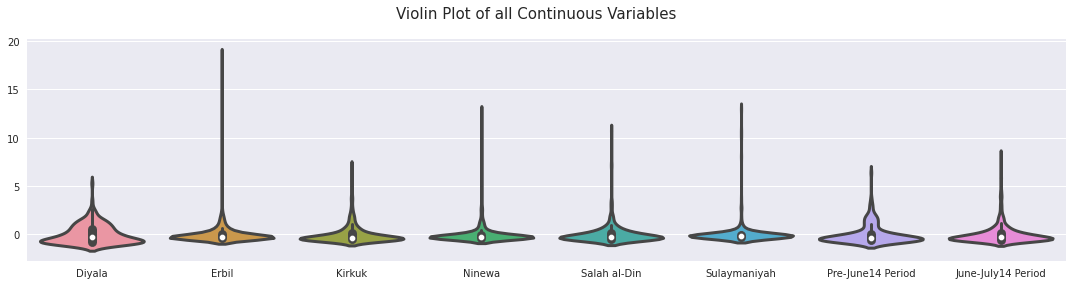

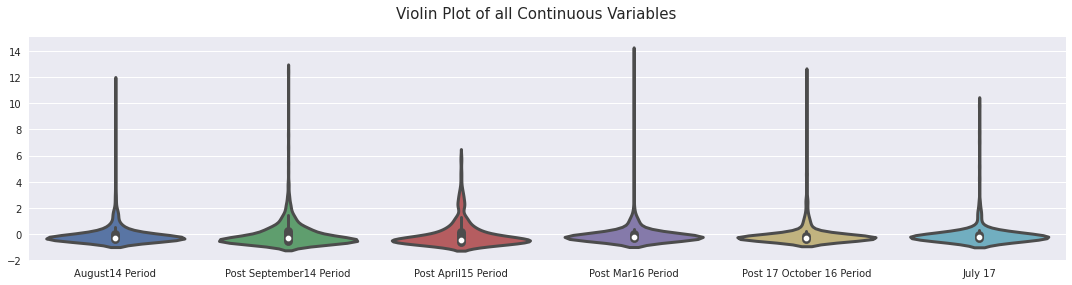

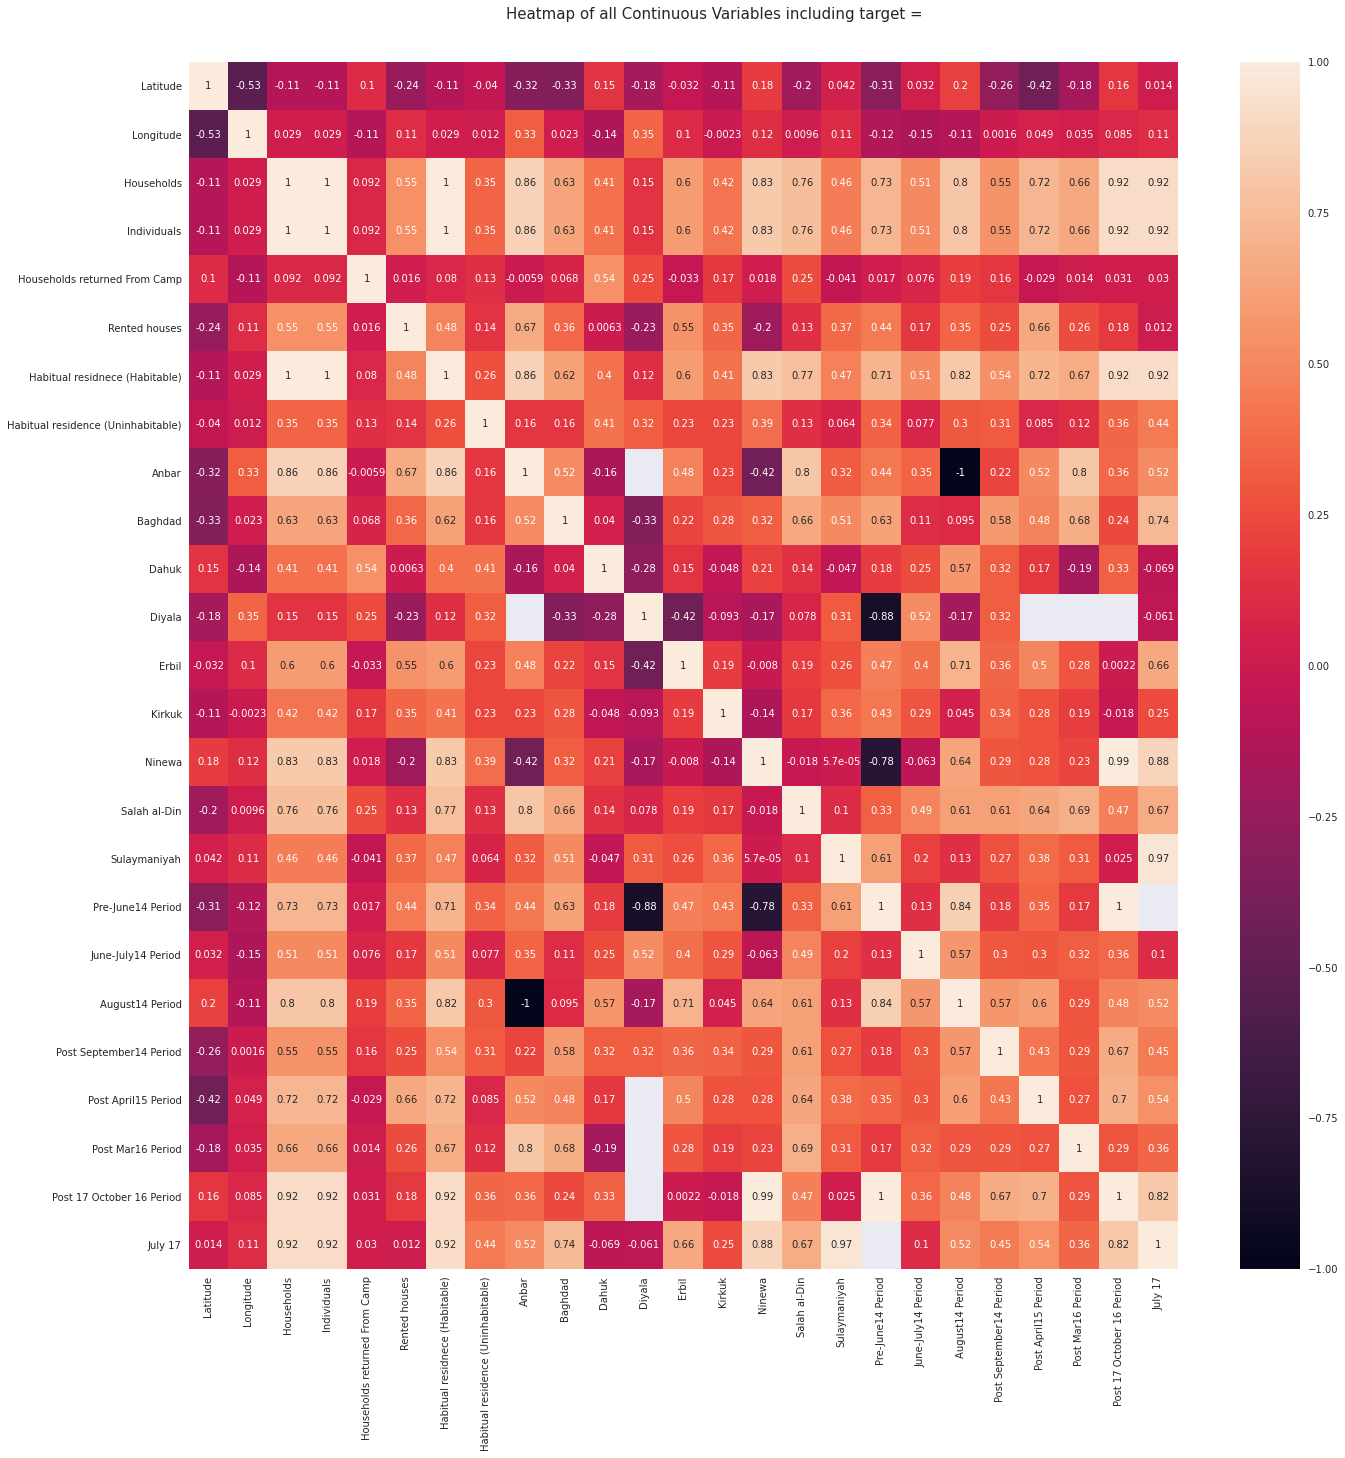

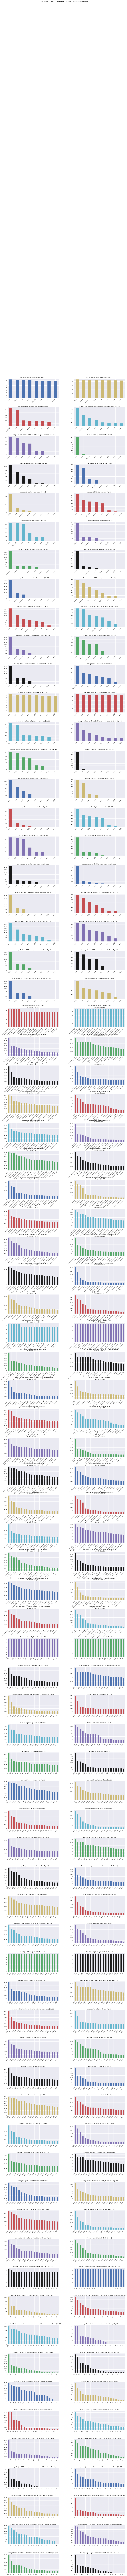

Time to run AutoViz (in seconds) = 715.156

 ###################### VISUALIZATION Completed ########################
Executing shutdown due to inactivity...


2021-03-07 10:42:50,440 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-03-07 10:42:50,640 - INFO     - Executing shutdown...


In [34]:
df = AV.AutoViz('data.csv')


In [65]:
df = data.groupby('governorate')[['host_families', 'hotel/motel',
       'rented_houses', 'habitual_residnece_(habitable)',
       'habitual_residence_(uninhabitable)', 'informal_settlements',
       'unfinished/\nabandoned_building', 'non-residential_structure',
       'religious_building', 'school_building',
       'other_formal_settlements/_collective_centres']].sum()

In [66]:
df.head()

host_families  hotel/motel  rented_houses  \
governorate                                              
Anbar                552.0          0.0        31626.0   
Baghdad              306.0          0.0          312.0   
Dahuk                  0.0          0.0            0.0   
Diyala               120.0          0.0         3018.0   
Erbil                  6.0          0.0          192.0   

             habitual_residnece_(habitable)  \
governorate                                   
Anbar                             1427958.0   
Baghdad                             85914.0   
Dahuk                                 768.0   
Diyala                             209676.0   
Erbil                               53988.0   

             habitual_residence_(uninhabitable)  informal_settlements  \
governorate                                                             
Anbar                                   41040.0                   0.0   
Baghdad                                  4476.0                   0.0   
Dahuk                                       0.0                   0.0   
Diyala                                  23760.0                   0.0   
Erbil                                       0.0                 102.0   

             unfinished/\nabandoned_building  non-residential_structure  \
governorate                                                               
Anbar                                    0.0                        0.0   
Baghdad                                  0.0                        0.0   
Dahuk                                    0.0                        0.0   
Diyala                                   0.0                        0.0   
Erbil                                   48.0                        0.0   

             religious_building  school_building  \
governorate                                        
Anbar                       0.0              0.0   
Baghdad                     0.0              0.0   
Dahuk                       0.0              0.0   
Diyala                      0.0              0.0   
Erbil                       0.0              0.0   

             other_formal_settlements/_collective_centres  
governorate                                                
Anbar                                              3456.0  
Baghdad                                               0.0  
Dahuk                                                 0.0  
Diyala                                                0.0  
Erbil                                                 0.0

In [67]:
df['total'] = df.sum(axis = 1)

df['total_critical'] = df[['habitual_residence_(uninhabitable)', 'informal_settlements',
       'unfinished/\nabandoned_building', 'non-residential_structure',
       'religious_building', 'school_building',
       'other_formal_settlements/_collective_centres']].sum(axis = 1)
df.head()

host_families  hotel/motel  rented_houses  \
governorate                                              
Anbar                552.0          0.0        31626.0   
Baghdad              306.0          0.0          312.0   
Dahuk                  0.0          0.0            0.0   
Diyala               120.0          0.0         3018.0   
Erbil                  6.0          0.0          192.0   

             habitual_residnece_(habitable)  \
governorate                                   
Anbar                             1427958.0   
Baghdad                             85914.0   
Dahuk                                 768.0   
Diyala                             209676.0   
Erbil                               53988.0   

             habitual_residence_(uninhabitable)  informal_settlements  \
governorate                                                             
Anbar                                   41040.0                   0.0   
Baghdad                                  4476.0                   0.0   
Dahuk                                       0.0                   0.0   
Diyala                                  23760.0                   0.0   
Erbil                                       0.0                 102.0   

             unfinished/\nabandoned_building  non-residential_structure  \
governorate                                                               
Anbar                                    0.0                        0.0   
Baghdad                                  0.0                        0.0   
Dahuk                                    0.0                        0.0   
Diyala                                   0.0                        0.0   
Erbil                                   48.0                        0.0   

             religious_building  school_building  \
governorate                                        
Anbar                       0.0              0.0   
Baghdad                     0.0              0.0   
Dahuk                       0.0              0.0   
Diyala                      0.0              0.0   
Erbil                       0.0              0.0   

             other_formal_settlements/_collective_centres      total  
governorate                                                           
Anbar                                              3456.0  1504632.0  
Baghdad                                               0.0    91008.0  
Dahuk                                                 0.0      768.0  
Diyala                                                0.0   236574.0  
Erbil                                                 0.0    54336.0

host_families  hotel/motel  rented_houses  \
governorate                                              
Anbar                552.0          0.0        31626.0   
Baghdad              306.0          0.0          312.0   
Dahuk                  0.0          0.0            0.0   
Diyala               120.0          0.0         3018.0   
Erbil                  6.0          0.0          192.0   

             habitual_residnece_(habitable)  \
governorate                                   
Anbar                             1427958.0   
Baghdad                             85914.0   
Dahuk                                 768.0   
Diyala                             209676.0   
Erbil                               53988.0   

             habitual_residence_(uninhabitable)  informal_settlements  \
governorate                                                             
Anbar                                   41040.0                   0.0   
Baghdad                                  4476.0                   0.0   
Dahuk                                       0.0                   0.0   
Diyala                                  23760.0                   0.0   
Erbil                                       0.0                 102.0   

             unfinished/\nabandoned_building  non-residential_structure  \
governorate                                                               
Anbar                                    0.0                        0.0   
Baghdad                                  0.0                        0.0   
Dahuk                                    0.0                        0.0   
Diyala                                   0.0                        0.0   
Erbil                                   48.0                        0.0   

             religious_building  school_building  \
governorate                                        
Anbar                       0.0              0.0   
Baghdad                     0.0              0.0   
Dahuk                       0.0              0.0   
Diyala                      0.0              0.0   
Erbil                       0.0              0.0   

             other_formal_settlements/_collective_centres      total  \
governorate                                                            
Anbar                                              3456.0  1504632.0   
Baghdad                                               0.0    91008.0   
Dahuk                                                 0.0      768.0   
Diyala                                                0.0   236574.0   
Erbil                                                 0.0    54336.0   

             total_critical  
governorate                  
Anbar               44496.0  
Baghdad              4476.0  
Dahuk                   0.0  
Diyala              23760.0  
Erbil                 150.0

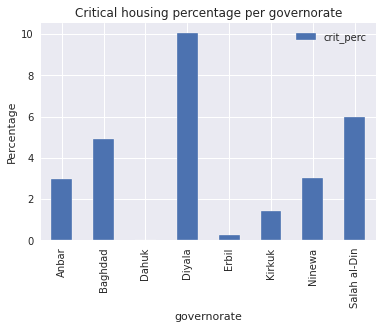

AttributeError: module 'matplotlib.pyplot' has no attribute 'size'

In [113]:
df_total = df[['total', 'total_critical']]
df_total['crit_perc'] = df['total_critical'].mul(100).div(df['total'])

df_total.plot(y = 'crit_perc', kind = 'bar', title  = 'Critical housing percentage per governorate')
plt.ylabel('Percentage')
plt.show()

Since Diyala is the governoarate with the highest percentage of critical housing, we will dig deeper in it. 

In [124]:
diyala = data[data['governorate'] == 'Diyala']
diyala.head()

date_reported date_occurred  round_#  place_id country country_code  \
449    2020-01-25    2020-12-31      119     26057    Iraq           IQ   
450    2020-01-25    2020-12-31      119     25662    Iraq           IQ   
451    2020-01-25    2020-12-31      119     25681    Iraq           IQ   
452    2020-01-25    2020-12-31      119     25667    Iraq           IQ   
453    2020-01-25    2020-12-31      119     25666    Iraq           IQ   

    governorate governorate_code   district location_name\nin_english  ...  \
449      Diyala            IQG10  Al-Khalis         Al Rmelat Village  ...   
450      Diyala            IQG10  Al-Khalis        Al-Arabdah Village  ...   
451      Diyala            IQG10  Al-Khalis       Ali Abdulla village  ...   
452      Diyala            IQG10  Al-Khalis       Al-Makareen Village  ...   
453      Diyala            IQG10  Al-Khalis        Al-Mashroo Village  ...   

    post_september14_period  post_april15_period  post_mar16_period  \
449                     NaN                  NaN                NaN   
450                     NaN                  NaN                NaN   
451                    72.0                  NaN                NaN   
452                     NaN                  NaN                NaN   
453                   432.0                  NaN                NaN   

     post_17_october_16_period  july_17  jan_19  jan_20  open_street_map  \
449                        NaN      NaN     NaN     NaN         Maplink1   
450                        NaN      NaN     NaN     NaN         Maplink1   
451                        NaN      NaN     NaN     NaN         Maplink1   
452                        NaN      NaN     NaN     NaN         Maplink1   
453                        NaN      NaN     NaN     NaN         Maplink1   

     google_map  bing_map  
449    Maplink2  Maplink3  
450    Maplink2  Maplink3  
451    Maplink2  Maplink3  
452    Maplink2  Maplink3  
453    Maplink2  Maplink3  

[5 rows x 60 columns]

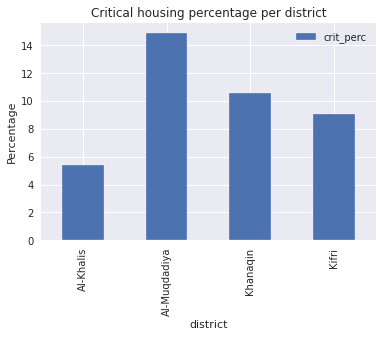

In [132]:
diyala_gp = diyala.groupby('district')[['host_families', 'hotel/motel',
       'rented_houses', 'habitual_residnece_(habitable)',
       'habitual_residence_(uninhabitable)', 'informal_settlements',
       'unfinished/\nabandoned_building', 'non-residential_structure',
       'religious_building', 'school_building',
       'other_formal_settlements/_collective_centres']].sum()

diyala_gp['total'] = diyala_gp.sum(axis = 1)

diyala_gp['total_critical'] = diyala_gp[['habitual_residence_(uninhabitable)', 'informal_settlements',
       'unfinished/\nabandoned_building', 'non-residential_structure',
       'religious_building', 'school_building',
       'other_formal_settlements/_collective_centres']].sum(axis = 1)
diyala_gp = diyala_gp[['total', 'total_critical']]
diyala_gp['crit_perc'] = diyala_gp['total_critical'].mul(100).div(diyala_gp['total'])

diyala_gp.plot(y = 'crit_perc', kind = 'bar', title  = 'Critical housing percentage per district')
plt.ylabel('Percentage')
plt.show()

In [70]:
df_perc = df[['host_families', 'hotel/motel',
       'rented_houses', 'habitual_residnece_(habitable)',
       'habitual_residence_(uninhabitable)', 'informal_settlements',
       'unfinished/\nabandoned_building', 'non-residential_structure',
       'religious_building', 'school_building',
       'other_formal_settlements/_collective_centres']].mul(100).div(df.total, axis=0)

In [84]:
df_plot = df_perc.loc[:, 'habitual_residence_(uninhabitable)':'other_formal_settlements/_collective_centres']

# Joining dataframes



In [143]:
import os
from bs4 import BeautifulSoup
# Python 3.x
from urllib.request import urlopen, urlretrieve

URL = 'https://data.humdata.org/dataset/iraq-returnee-data-iom-dtm'
OUTPUT_DIR = ''  # path to output folder, '.' or '' uses current folder

u = urlopen(URL)
try:
    html = u.read().decode('utf-8')
finally:
    u.close()

soup = BeautifulSoup(html, "html.parser")
print(soup)
# print(soup.select('a[href^="http://"]'))

for link in soup.select('a[href^="http://"]'):
    print(link)
    href = link.get('href')
    if not any(href.endswith(x) for x in ['.csv','.xls','.xlsx']):
        continue

    filename = os.path.join(OUTPUT_DIR, href.rsplit('/', 1)[-1])

    # We need a https:// URL for this site
    href = href.replace('http://','https://')

    print("Downloading %s to %s..." % (href, filename) )
    urlretrieve(href, filename)
    print("Done.")


<!DOCTYPE html>

<!--[if IE 7]> <html lang="en_AU" class="ie ie7"> <![endif]-->
<!--[if IE 8]> <html lang="en_AU" class="ie ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en_AU" class="ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en_AU"> <!--<![endif]-->
<head>
<link href="/fanstatic/vendor/:version:2021-03-02T10:49:09/select2/select2.css" rel="stylesheet" type="text/css"/>
<link href="/fanstatic/hdx_theme/:version:2021-03-02T10:49:09/vendor/bootstrap/css/bootstrap.min.css" rel="stylesheet" type="text/css"/>
<link href="/fanstatic/hdx_theme/:version:2021-03-02T10:49:09/:bundle:base/header.css;datasets/dataset.css;datasets/datasets.css;datasets/hdx_custom_dataviz_show.css;vendor/c3/c3.min.css;widget/onboarding/onboarding.css;widget/onboarding/two-column.css;widget/popup/popup-hxl.css;base/base.css;widget/popup/popup.css;widget/onboarding/login.css;requestdata/request-data.css;base/components/banner.css;datasets/related.css;widget/membership/contact-contributor.css;widget/member